# Base Model

In [1]:
# z-score based trading system

import pandas as pd
# Read parquet file into a DataFrame
df = pd.read_parquet(r"C:\Users\Chitwan\Downloads\data (1).parquet")
df#Base Modek

,banknifty,nifty,tte
time,,,
2021-01-01 09:15:00,0.286058,0.199729,27
2021-01-01 09:16:00,0.285381,0.200433,27
2021-01-01 09:17:00,0.284233,0.200004,27
2021-01-01 09:18:00,0.286104,0.199860,27
2021-01-01 09:19:00,0.285539,0.198951,27
...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28
2022-06-30 15:27:00,0.240875,0.216558,28
2022-06-30 15:28:00,0.242115,0.216794,28


In [2]:
# checking null values
df.isnull().sum()

banknifty    1500
nifty        2000
tte             0
dtype: int64

In [3]:
df= df.interpolate(method='linear')
# checking null values
df.isnull().sum()

banknifty    0
nifty        0
tte          0
dtype: int64

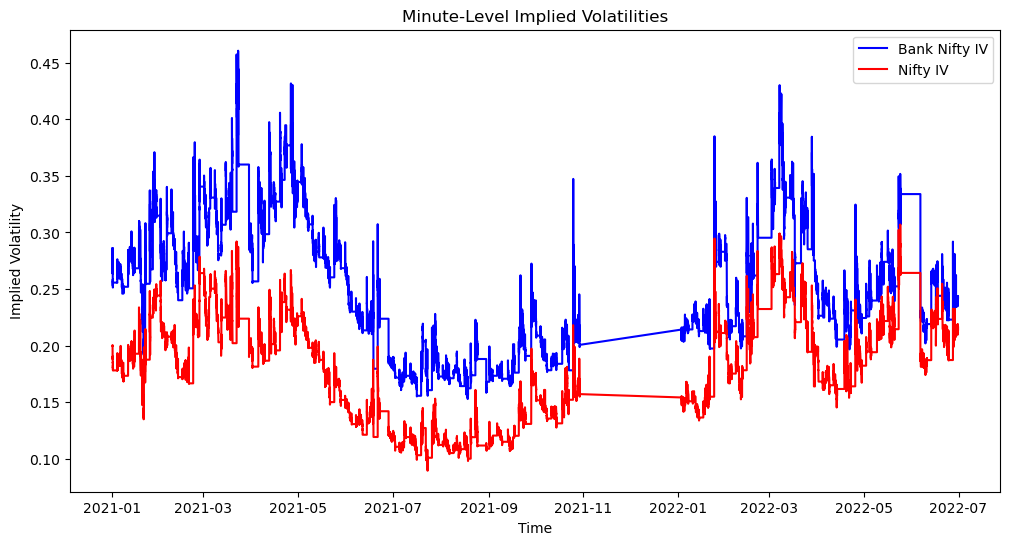

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting minute-level implied volatilities for Bank Nifty and Nifty
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['banknifty'], label='Bank Nifty IV', color='blue')
plt.plot(df.index, df['nifty'], label='Nifty IV', color='red')
plt.title('Minute-Level Implied Volatilities')
plt.xlabel('Time')
plt.ylabel('Implied Volatility')
plt.legend()
plt.show()

In [5]:
df['spread'] = df['banknifty'] - df['nifty']
df['PnL'] = df['spread'] * (df['tte'] ** 0.7)

In [6]:
# Calculate z-score
window_size = 2000  # You need to define this
df['Z_Score'] = (df['spread'] - df['spread'].rolling(window=window_size).mean()) / df['spread'].rolling(window=window_size).std()

# Define entry threshold
entry_threshold = -1.5  # You need to define this

# Generate trading signals
df['Signal'] = 0
df.loc[df['Z_Score'] > entry_threshold, 'Signal'] = 1  # Short Bank Nifty IV, Long Nifty IV
df.loc[df['Z_Score'] < entry_threshold, 'Signal'] = -1   # Long Bank Nifty IV, Short Nifty IV

# Calculate returns
df['Returns'] = df['Signal'].shift(1) * df['PnL']

In [7]:
# Calculate performance metrics for Base Model
base_model_pl = df['Returns'].sum()
base_model_sharpe_ratio = df['Returns'].mean() / df['Returns'].std()
base_model_drawdown = (df['Returns'].cumsum() - df['Returns'].cumsum().cummax()).min()

# Print the results
print("Base Model Performance:")
print("Total P/L:", base_model_pl)
print("Sharpe Ratio:", base_model_sharpe_ratio)
print("Drawdown:", base_model_drawdown)

Base Model Performance:
Total P/L: 193137.12658936824
Sharpe Ratio: 0.7315849302994706
Drawdown: -678.7544269103528


# New Model

In [8]:
import numpy as np
df['spread_2'] =  df['banknifty'] - 0.9*df['nifty'] - 0.015

df['PnL_2'] = df['spread_2'] * (df['tte'] ** 0.7)

In [9]:
# Calculate z-score
window_size = 2000  # You need to define this
df['Z_Score_2'] = (df['spread_2'] - df['spread_2'].rolling(window=window_size).mean()) / df['spread'].rolling(window=window_size).std()

# Define entry threshold
entry_threshold = -2  # You need to define this

# Generate trading signals
df['Signal_2'] = 0
df.loc[df['Z_Score_2'] > entry_threshold, 'Signal_2'] = 1  # Short Bank Nifty IV, Long Nifty IV
df.loc[df['Z_Score_2'] < entry_threshold, 'Signal_2'] = -1   # Long Bank Nifty IV, Short Nifty IV

# Calculate returns
df['Returns_2'] = df['Signal_2'].shift(1) * df['PnL_2']


In [10]:
advanced_model_pl = df['Returns_2'].sum()
advanced_model_sharpe_ratio = df['Returns_2'].mean() / df['Returns_2'].std()
advanced_model_drawdown = (df['Returns_2'].cumsum() - df['Returns_2'].cumsum().cummax()).min()

# Print the results
print("\nAdvanced Model Performance:")
print("Total P/L:", advanced_model_pl)
print("Sharpe Ratio:", advanced_model_sharpe_ratio)
print("Drawdown:", advanced_model_drawdown)


Advanced Model Performance:
Total P/L: 224711.3481712303
Sharpe Ratio: 0.8756891700227788
Drawdown: -525.4654508722306
